In [59]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

In [60]:
result_files = glob.glob("../src/dist/output/analysis/*.json")
result_data = []
files = []
for file in result_files:
    with open(file, "r") as f:
        result_data.append(json.load(f))
        files.append(file)
result_files = files

In [61]:
def get_data_by_filenames(filenames):
    result_datas = []
    for filename in filenames:
        filename = "/" +filename+".json"
        for i, f in enumerate(result_files):
            if filename in f:
                result_datas.append(result_data[i])
                break
    return result_datas

In [62]:
def get_node_load_data(simulationData):
    return simulationData["node-load-list"]

In [63]:
# [file][node][time]の配列に変換
def convert_node_load(data):
    load_data_list = []
    for d in data:
        node_data = get_node_load_data(d)
        load_data = []
        for j in range(len(node_data[0])):
            load_data_per_node = []
            for i in range(len(node_data)):
                load_data_per_node.append(node_data[i][j])
            load_data.append(load_data_per_node)  
        load_data_list.append(load_data)   
    return load_data_list

In [64]:
def get_user_connection_data(simulationData):
    return simulationData["user-connection-list"]

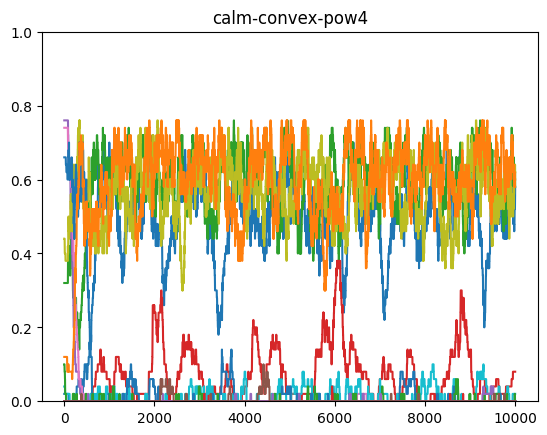

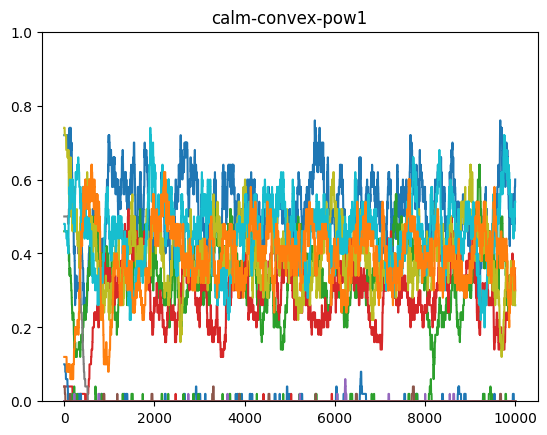

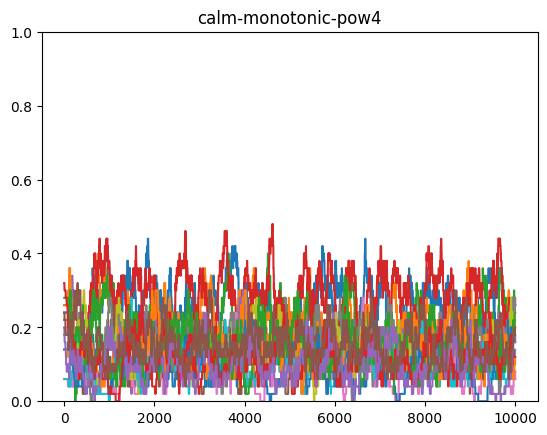

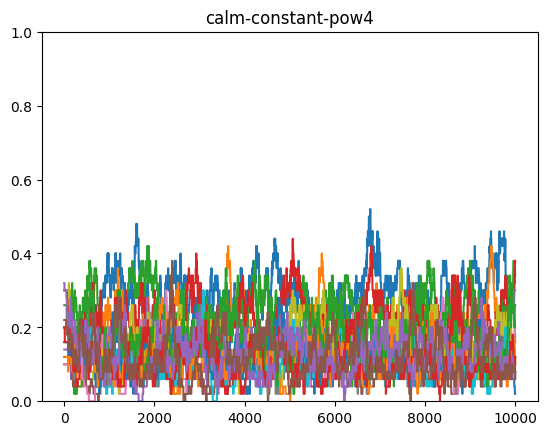

In [65]:
# ノードの負荷を表示
show_files = ["calm-convex-pow4", "calm-convex-pow1", "calm-monotonic-pow4", "calm-constant-pow4"]

data = get_data_by_filenames(show_files)
load_data_list = convert_node_load(data)
for i, load_data in enumerate(load_data_list):
    for node in load_data:
        plt.plot(node)
    plt.ylim(0,1)
    plt.title(show_files[i])
    plt.show()

calm-convex-pow4 ave: 0.41643160049074457
calm-convex-pow1 ave: 0.3887471054481853
calm-monotonic-pow4 ave: 0.15066710352774249
calm-constant-pow4 ave: 0.15018770622937708


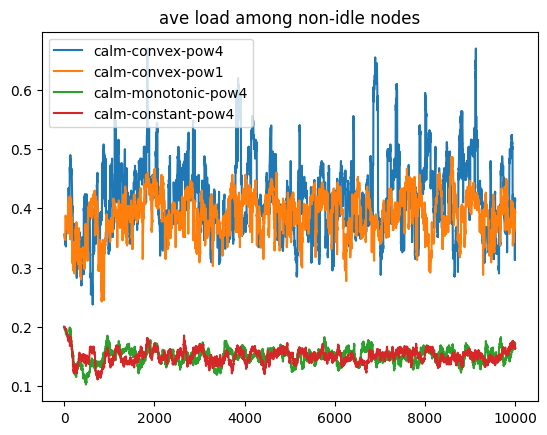

calm-convex-pow4 max: 0.76
calm-convex-pow1 max: 0.76
calm-monotonic-pow4 max: 0.48
calm-constant-pow4 max: 0.52


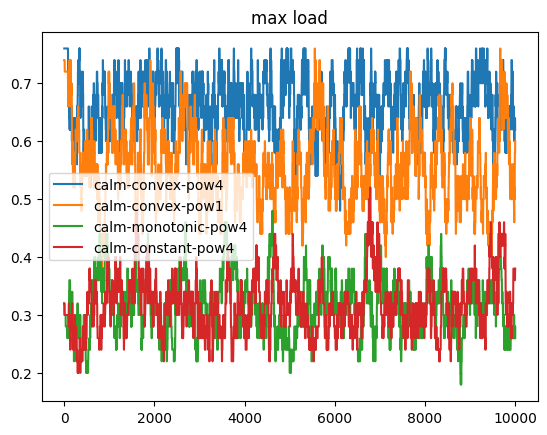

In [66]:
# 負荷の比較
show_files = ["calm-convex-pow4", "calm-convex-pow1", "calm-monotonic-pow4", "calm-constant-pow4"]

data = get_data_by_filenames(show_files)

ave_node_load_list = []
max_node_load_list = []

for i,d in enumerate(data): 
    ave_node_load = []
    max_node_load = []
    node_load_data = get_node_load_data(d)
    for timeStepData in node_load_data:
        ave = 0
        max = 0
        non_idle_num = 0
        for load in timeStepData:
            if load != 0:
                non_idle_num += 1
            ave += load
            if max < load:
                max = load
        ave /= non_idle_num
        ave_node_load.append(ave)
        max_node_load.append(max)
    ave_node_load_list.append(ave_node_load)
    max_node_load_list.append(max_node_load)
for i,ave in enumerate(ave_node_load_list):
    plt.plot(ave, label= show_files[i])
    print(show_files[i], "ave:", np.average(ave))
plt.title("ave load among non-idle nodes")    
plt.legend()
plt.show()

for i,max in enumerate(max_node_load_list):
    plt.plot(max, label= show_files[i])
    print(show_files[i], "max:", np.max(max))
plt.title("max load")
plt.legend()
plt.show()

calm-convex-pow4 ave num of idle: 10.15058494150585
calm-convex-pow1 ave num of idle: 9.784221577842215
calm-monotonic-pow4 ave num of idle: 0.073992600739926
calm-constant-pow4 ave num of idle: 0.0415958404159584


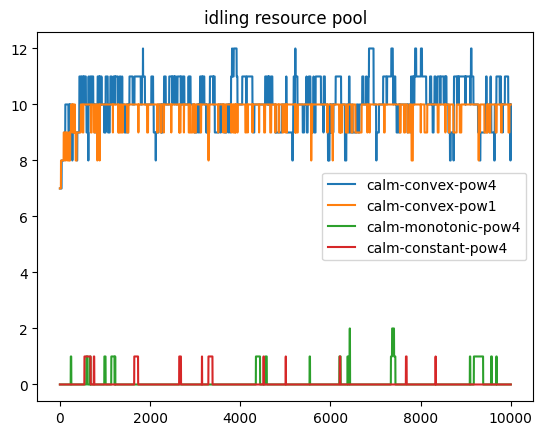

In [67]:
# アイドルリソース数を表示
show_files = ["calm-convex-pow4", "calm-convex-pow1", "calm-monotonic-pow4", "calm-constant-pow4"]

data = get_data_by_filenames(show_files)
for i,d in enumerate(data): 
    idling_resource_num = []
    node_load_data = get_node_load_data(d)
    for timeStepData in node_load_data:
        idling_resource_sum = 0
        for load in timeStepData:
            if load == 0:
                idling_resource_sum +=1
        idling_resource_num.append(idling_resource_sum)
    plt.plot(idling_resource_num, label=show_files[i])
    print(show_files[i], "ave num of idle:", np.average(idling_resource_num))
plt.title("idling resource pool")    
plt.legend()
plt.show()

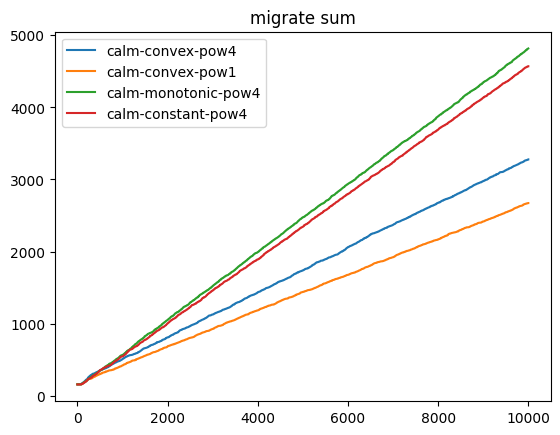

In [68]:
# サーバ切り替え回数の比較
show_files = ["calm-convex-pow4", "calm-convex-pow1", "calm-monotonic-pow4", "calm-constant-pow4"]

data = get_data_by_filenames(show_files)
for i, d in enumerate(data):
    user_connection_data = get_user_connection_data(d)
    migrate_sum_list = []
    migrate_sum = 0
    connect_node_list = [-1] * len(user_connection_data[0])
    for timeStepData in user_connection_data:
        for j in range(len(timeStepData)):
            if (connect_node_list[i] == -1) or (connect_node_list[j] == timeStepData[j]):
                pass
            else:
                migrate_sum +=1
            connect_node_list[j] = timeStepData[j]
        migrate_sum_list.append(migrate_sum)
    plt.plot(migrate_sum_list, label=show_files[i])
plt.title("migrate sum")    
plt.legend()
plt.show()

calm-convex-pow4 ave: 62.01737594584618
calm-convex-pow1 ave: 52.20274378144681
calm-monotonic-pow4 ave: 34.43841434273379
calm-constant-pow4 ave: 34.74687927187237
busy-convex-pow4 ave: 59.18171399885057


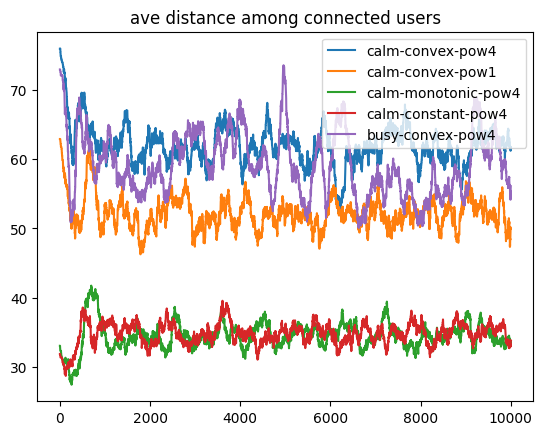

calm-convex-pow4 max: 119.97149695057874
calm-convex-pow1 max: 119.95948976753944
calm-monotonic-pow4 max: 83.4086622237706
calm-constant-pow4 max: 83.80687168951324
busy-convex-pow4 max: 131.63635335548736


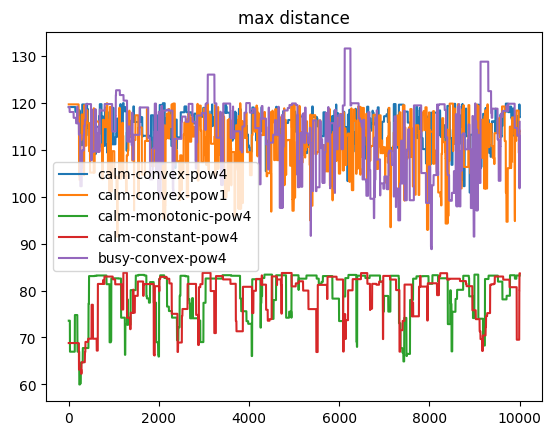

In [70]:
# 割り当て距離の比較
show_files = ["calm-convex-pow4", "calm-convex-pow1", "calm-monotonic-pow4", "calm-constant-pow4", "busy-convex-pow4"]

data = get_data_by_filenames(show_files)

ave_distance_list = []
max_distance_list = []

for i,d in enumerate(data): 
    ave_distance = []
    max_distance = []
    user_connection_data = d["user-connection-distance-list"]
    for timeStepData in user_connection_data:
        ave = 0
        max = 0
        connection_num = 0
        for distance in timeStepData:
            if distance >= 0:
                connection_num += 1
            ave += distance
            if max < distance:
                max = distance
        ave /= connection_num
        ave_distance.append(ave)
        max_distance.append(max)
    ave_distance_list.append(ave_distance)
    max_distance_list.append(max_distance)
for i,ave in enumerate(ave_distance_list):
    plt.plot(ave, label= show_files[i])
    print(show_files[i], "ave:", np.average(ave))
plt.title("ave distance in connected users")    
plt.legend()
plt.show()

for i,max in enumerate(max_distance_list):
    plt.plot(max, label= show_files[i])
    print(show_files[i], "max:", np.max(max))
plt.title("max distance")
plt.legend()
plt.show()